# Imports

In [2]:
# import necessary libraries and modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

In [3]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

In [4]:
def correlation(t, x, y):
    return np.mean(standard_units(t[x])*standard_units(t[y]))

# Prediction

Prediction is an important aspect of data science --- to find out what data can tell us about the future

Examples of questions that can be answered through prediction:
- What do data about climate and pollution say about temperatures a few decades from now? 
- Based on a person's internet profile, which websites are likely to interest them? 
- How can a patient's medical history be used to judge how well they will respond to a treatment?

# Regression

One of the most commonly used ways of predicting the value of one variable based on the value of another

# Correlation

A measure of linear association

Can be used to decide how good one variable will be as a predictor of another

# Example 1

Let's look at a dataset consisting of family heights

In [5]:
# load heights dataset into a dataframe and save in a variable

heights = pd.read_csv("family_heights.csv")

In [6]:
# display first few rows of heights data

heights.head()

,family,father,mother,midparentHeight,children,childNum,sex,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5


Note: the midparent height is an average of the heights of the two parents

In [7]:
# display basic info of heights data

heights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   family           934 non-null    object 
 1   father           934 non-null    float64
 2   mother           934 non-null    float64
 3   midparentHeight  934 non-null    float64
 4   children         934 non-null    int64  
 5   childNum         934 non-null    int64  
 6   sex              934 non-null    object 
 7   childHeight      934 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 58.5+ KB


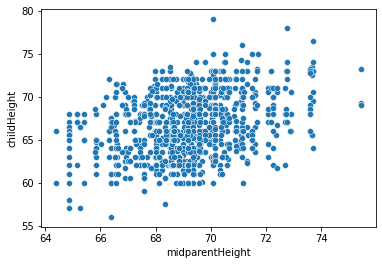

In [10]:
sns.scatterplot(data=heights, x='midparentHeight', y='childHeight')
plt.show()

In [11]:
r = correlation(heights, 'midparentHeight', 'childHeight')
r

0.32094989606395924

The correlation between midparent height and child's height is about 0.32.

## Correlation Coefficient

The correlation coefficient doesn’t just measure how clustered the points in a scatter plot are about a straight line. It also helps identify the straight line about which the points are clustered.

## The Equation of the Regression Line
In regression, we use the value of one variable (which we will call $x$) to predict the value of another (which we will call $y$). When the variables $x$ and $y$ are measured in standard units, the regression line for predicting $y$ based on $x$ has slope $r$ and passes through the origin. Thus the equation of the regression line can be written as:

$$
\mbox{estimate of }y ~=~ r \cdot x ~~~
\mbox{when both variables are measured in standard units}
$$

In the original units of the data, this becomes

$$
\frac{\mbox{estimate of}~y ~-~\mbox{average of}~y}{\mbox{SD of}~y}
~=~ r \times 
\frac{\mbox{the given}~x ~-~\mbox{average of}~x}{\mbox{SD of}~x}
$$

![regline](regline.png)

The slope and intercept of the regression line in original units can be derived from the diagram above. 

$$
\mathbf{\mbox{slope of the regression line}} ~=~ r \cdot
\frac{\mbox{SD of }y}{\mbox{SD of }x}
$$

$$
\mathbf{\mbox{intercept of the regression line}} ~=~
\mbox{average of }y ~-~ \mbox{slope} \cdot \mbox{average of }x
$$

The functions below compute the slope and intercept. All of them take three arguments: the name of the DataFrame, the label of the column containing $x$, and the label of the column containing $y$.

In [12]:
def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t[label_y])/np.std(t[label_x])

def intercept(t, label_x, label_y):
    return np.mean(t[label_y]) - slope(t, label_x, label_y)*np.mean(t[label_x])

## The Regression Line in the Units of the Data

We can find the equation of the regression line for predicting the child's height based on midparent height.

In [13]:
family_slope = slope(heights, 'midparentHeight', 'childHeight')
family_intercept = intercept(heights, 'midparentHeight', 'childHeight')
family_slope, family_intercept

(0.637360896969479, 22.63624054958975)

The equation of the regression line is

$$
\mbox{estimate of child's height} ~=~ 0.64 \cdot \mbox{midparent height} ~+~ 22.64
$$

This is also known as the *regression equation.* The principal use of the regression equation is to predict $y$ based on $x$.

For example, for a midparent height of 70.48 inches, the regression equation predicts the child's height to be about 67.56 inches.

In [14]:
family_slope * 70.48 + family_intercept

67.55743656799862

In [15]:
heights_with_predictions = heights.copy()
heights_with_predictions["Regression Prediction"] = family_slope * heights['midparentHeight'] + family_intercept
heights_with_predictions

,family,father,mother,midparentHeight,children,childNum,sex,childHeight,Regression Prediction
0,1,78.5,67.0,75.43,4,1,male,73.2,70.712373
1,1,78.5,67.0,75.43,4,2,female,69.2,70.712373
2,1,78.5,67.0,75.43,4,3,female,69.0,70.712373
3,1,78.5,67.0,75.43,4,4,female,69.0,70.712373
4,2,75.5,66.5,73.66,4,1,male,73.5,69.584244
...,...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0,65.109971
930,203,62.0,66.0,66.64,3,2,female,62.0,65.109971
931,203,62.0,66.0,66.64,3,3,female,61.0,65.109971
932,204,62.5,63.0,65.27,2,1,male,66.5,64.236786


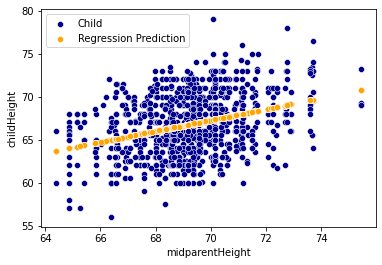

In [16]:
sns.scatterplot(data=heights_with_predictions, x='midparentHeight', y='childHeight', color='darkblue')
sns.scatterplot(data=heights_with_predictions, x='midparentHeight', y='Regression Prediction', color='orange')
plt.legend(['Child', 'Regression Prediction'])
plt.show()

## Fitted Values
The predictions are known as the "fitted values". The calculation to arrive at the fitted values can be generalized through a function. Define a function named `fit()` takes the name of a DataFrame and the labels of $x$ and $y$, and returns an array of fitted values, one fitted value for each data point.

In [17]:
def fit(df, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(df, x, y)
    b = intercept(df, x, y)
    return a * df[x] + b

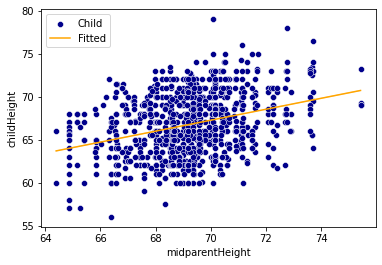

In [18]:
sns.scatterplot(data=heights, x='midparentHeight', y='childHeight', color ='darkblue')
sns.lineplot(x=heights['midparentHeight'], y=fit(heights, 'midparentHeight', 'childHeight'), color='orange')
plt.legend(['Child', 'Fitted'])
plt.show()

# Example 2

In [26]:
maternal_data = pd.read_csv("maternal_data.csv")

In [27]:
maternal_data.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


In [28]:
maternal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Birth Weight               1174 non-null   int64
 1   Gestational Days           1174 non-null   int64
 2   Maternal Age               1174 non-null   int64
 3   Maternal Height            1174 non-null   int64
 4   Maternal Pregnancy Weight  1174 non-null   int64
 5   Maternal Smoker            1174 non-null   bool 
dtypes: bool(1), int64(5)
memory usage: 47.1 KB


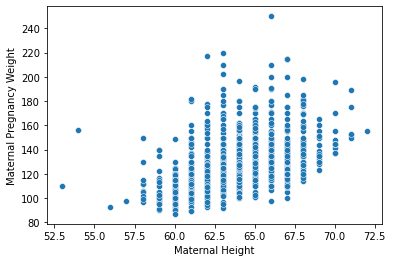

In [29]:
sns.scatterplot(data = maternal_data, x = "Maternal Height", y = "Maternal Pregnancy Weight")
plt.show()

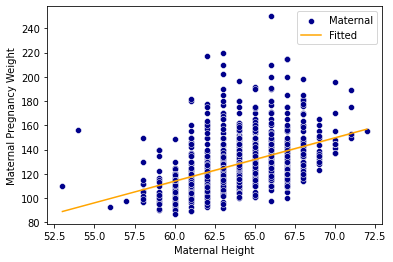

In [31]:
sns.scatterplot(data=maternal_data, x = "Maternal Height", y = "Maternal Pregnancy Weight", color='darkblue')
sns.lineplot(x=maternal_data["Maternal Height"], y=fit(maternal_data, x = "Maternal Height", y = "Maternal Pregnancy Weight"), color='orange')
plt.legend(['Maternal', 'Fitted'])
plt.show()

In [32]:
maternal_slope = slope(maternal_data, "Maternal Height", "Maternal Pregnancy Weight")
maternal_slope

3.572846259275056

The slope of the regression line is about **3.57 pounds per inch**. This means that for two women who are 1 inch apart in height, our prediction of pregnancy weight will differ by 3.57 pounds. For a woman who is 2 inches taller than another, our prediction of pregnancy weight will be

$$
2 \times 3.57 ~=~ 7.14
$$

pounds more than our prediction for the shorter woman.

In [33]:
maternal_intercept = intercept(maternal_data, "Maternal Height", "Maternal Pregnancy Weight")
maternal_intercept

-100.35996730828666

In [34]:
# For example, maternal height is 65 inches. 
# What is the predicted value for maternal pregnancy weight for that individual?

maternal_slope * 65 + maternal_intercept

131.87503954459197

In [35]:
data_with_preds = maternal_data.copy()
data_with_preds["Fitted Value"] = fit(maternal_data, x = "Maternal Height", y = "Maternal Pregnancy Weight")
data_with_preds

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker,Fitted Value
0,120,284,27,62,100,False,121.156501
1,113,282,33,64,135,False,128.302193
2,128,279,28,64,115,True,128.302193
3,108,282,23,67,125,True,139.020732
4,136,286,25,62,93,False,121.156501
...,...,...,...,...,...,...,...
1169,113,275,27,60,100,False,114.010808
1170,128,265,24,67,120,False,139.020732
1171,130,291,30,65,150,True,131.875040
1172,125,281,21,65,110,False,131.875040
